In [1]:
import math
import sys
sys.path.append("../Library/")

import image_download as imd
import db_connection

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
locations_list = [
    {
        "lat": 51,
        "lon": 2.3,
        "zoom": 10,
        "pixels": 640,
        "num_images": 2
    }
]
locations_list

[{'lat': 51, 'lon': 2.3, 'num_images': 2, 'pixels': 640, 'zoom': 10}]

In [3]:
for location in locations_list:
    meters_per_px = imd.zoom_in_meters_per_pixel(location["zoom"], location["lat"])
    image_size = meters_per_px*location["pixels"]
    location["meters_per_px"] = meters_per_px
    location["img_size"] = image_size
locations_list

[{'img_size': 61572.32707666399,
  'lat': 51,
  'lon': 2.3,
  'meters_per_px': 96.20676105728748,
  'num_images': 2,
  'pixels': 640,
  'zoom': 10}]

In [6]:
images_list = []
for location in locations_list:
    links = imd.generate_gmaps_links(
        location["lat"], 
        location["lon"],
        location["zoom"],
        location["pixels"],
        location["num_images"],
        center = True, xy_to_ij = True
    ) 
    print(links)
    count = 0
    for link in links:
        count += 1
        img = {}
        img = location.copy()
        del img["num_images"]
        img["link"] = link
        img["filename"] = str(img["lat"]) + '_' + str(img["lon"]) + '_' + str(img["zoom"]) + '_' + str(count)
        images_list.append(img)
images_list[:2]

In [32]:
# To-DO: download images, save with corresponding filename and update metadata
#images = imd.download_images(links, plot_images = True)

In [35]:
db = db_connection.connect("../credentials/mlab_db.txt","mfp")

DB Credentials from file
DB connected successfully!!!


In [38]:
images_lib_col = db["images_lib"]

In [39]:
result = list(images_lib_col.find({}))
print(len(result))

0


In [37]:
# uncomment to delete
#result = images_lib_col.delete_many({})
#print(result.deleted_count, " documents deleted")

In [40]:
images_lib_col.insert_many(images_list)

In [41]:
result = list(images_lib_col.find({}))
print(len(result))

4


In [30]:
images

NameError: name 'images' is not defined

In [31]:
images[0]

NameError: name 'images' is not defined

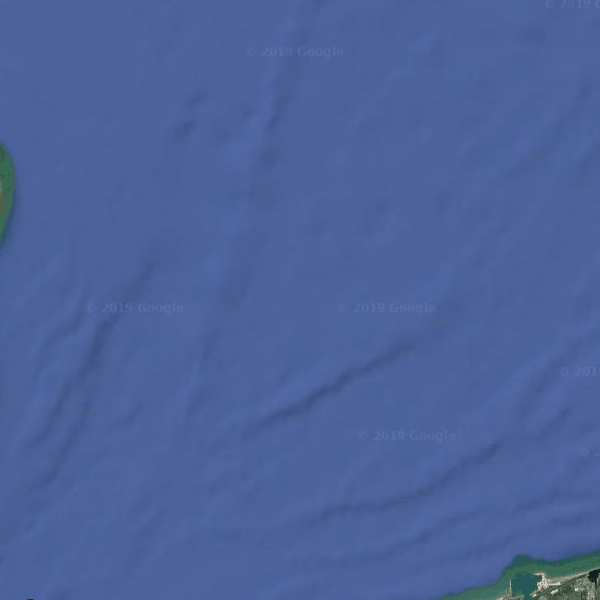

In [39]:
from PIL import ImageOps

margin = 20
border = (margin, margin, margin, margin) # left, up, right, bottom
ImageOps.crop(images[0], border)

In [6]:
IMG_FOLDER = os.environ["MFP_IMG_FOLDER"]
with open(MFP_IMG_FOLDER+"test.txt", "w") as f:
    f.write("hello")